<a href="https://colab.research.google.com/github/NikuDubenco/DS-Unit-2-Regression-1/blob/master/Nicolae_Dubenco_doing_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']
data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [0]:
columns = ['Year','Average Recent Growth in Personal Incomes']
data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [0]:
columns = ['Year','US Military Fatalities per Million']
data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

In [5]:
df = votes.merge(growth).merge(deaths)
df.shape

(17, 6)

In [6]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million
0,1952,Stevenson,Eisenhower,44.60,2.40,190
1,1956,Eisenhower,Stevenson,57.76,2.89,0
2,1960,Nixon,Kennedy,49.91,0.85,0
3,1964,Johnson,Goldwater,61.34,4.21,1
4,1968,Humphrey,Nixon,49.60,3.02,146
5,1972,Nixon,McGovern,61.79,3.62,0
6,1976,Ford,Carter,48.95,1.08,2
7,1980,Carter,Reagan,44.70,-0.39,0
8,1984,Reagan,Mondale,59.17,3.86,0
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0


In [0]:
target = 'Incumbent Party Vote Share'
df['Mean Baseline'] = df[target].mean()
df['Error'] = df['Mean Baseline'] - df[target]

In [9]:
df['Absolute Error'] = df['Error'].abs()
df['Absolute Error'].sum()

75.88470588235293

In [10]:
df['Absolute Error'].mean()

4.463806228373703

In [11]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=df['Incumbent Party Vote Share'], y_pred=df['Mean Baseline'])

4.463806228373702

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [14]:
X = df[['Average Recent Growth in Personal Incomes']]
y = df['Incumbent Party Vote Share']

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [0]:
features = ['Average Recent Growth in Personal Incomes']
target = 'Incumbent Party Vote Share'
X = df[features]
y = df[target]

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X)

In [18]:
mean_absolute_error(y, y_pred)

2.5291938349608953

In [19]:
df['Linear Regression, 1 feature'] = y_pred
df['Error'] = df['Linear Regression, 1 feature'] - df[target]
df['Absolute Error'] = df['Error'].abs()
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature"
0,1952,Stevenson,Eisenhower,44.60,2.40,190,51.828235,9.037235,9.037235,53.637235
1,1956,Eisenhower,Stevenson,57.76,2.89,0,51.828235,-2.665418,2.665418,55.094582
2,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.882740,0.882740,49.027260
3,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-2.319505,2.319505,59.020495
4,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,5.881225,5.881225,55.481225
5,1972,Nixon,McGovern,61.79,3.62,0,51.828235,-4.524269,4.524269,57.265731
6,1976,Ford,Carter,48.95,1.08,2,51.828235,0.761321,0.761321,49.711321
7,1980,Carter,Reagan,44.70,-0.39,0,51.828235,0.639281,0.639281,45.339281
8,1984,Reagan,Mondale,59.17,3.86,0,51.828235,-1.190467,1.190467,57.979533
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,51.828235,-0.689408,0.689408,53.250592


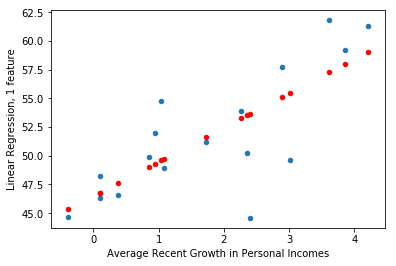

In [22]:
ax = df.plot(x='Average Recent Growth in Personal Incomes', 
             y='Incumbent Party Vote Share', kind='scatter')

df.plot(x='Average Recent Growth in Personal Incomes', 
        y='Linear Regression, 1 feature', kind='scatter', 
        color='r', ax=ax);

## Import 2 new features

In [27]:
from google.colab import files
files.upload()

Saving Real Gross Domestic Product.csv to Real Gross Domestic Product (1).csv
Saving Unemployment Rate Aged 15-64 USA.csv to Unemployment Rate Aged 15-64 USA.csv


{'Real Gross Domestic Product.csv': b'DATE,A191RL1A225NBEA\n1952-01-01,4.1\n1953-01-01,4.7\n1954-01-01,-0.6\n1955-01-01,7.1\n1956-01-01,2.1\n1957-01-01,2.1\n1958-01-01,-0.7\n1959-01-01,6.9\n1960-01-01,2.6\n1961-01-01,2.6\n1962-01-01,6.1\n1963-01-01,4.4\n1964-01-01,5.8\n1965-01-01,6.5\n1966-01-01,6.6\n1967-01-01,2.7\n1968-01-01,4.9\n1969-01-01,3.1\n1970-01-01,0.2\n1971-01-01,3.3\n1972-01-01,5.3\n1973-01-01,5.6\n1974-01-01,-0.5\n1975-01-01,-0.2\n1976-01-01,5.4\n1977-01-01,4.6\n1978-01-01,5.5\n1979-01-01,3.2\n1980-01-01,-0.3\n1981-01-01,2.5\n1982-01-01,-1.8\n1983-01-01,4.6\n1984-01-01,7.2\n1985-01-01,4.2\n1986-01-01,3.5\n1987-01-01,3.5\n1988-01-01,4.2\n1989-01-01,3.7\n1990-01-01,1.9\n1991-01-01,-0.1\n1992-01-01,3.5\n1993-01-01,2.8\n1994-01-01,4\n1995-01-01,2.7\n1996-01-01,3.8\n1997-01-01,4.4\n1998-01-01,4.5\n1999-01-01,4.8\n2000-01-01,4.1\n2001-01-01,1\n2002-01-01,1.7\n2003-01-01,2.9\n2004-01-01,3.8\n2005-01-01,3.5\n2006-01-01,2.9\n2007-01-01,1.9\n2008-01-01,-0.1\n2009-01-01,-2.5\n2010-01

In [0]:
unemployment = pd.read_csv('Unemployment Rate Aged 15-64 USA.csv')
gdp = pd.read_csv('Real Gross Domestic Product.csv')

In [29]:
unemployment.head()

,DATE,LRUN64TTUSA156N
0,1960-01-01,5.617115
1,1961-01-01,6.770271
2,1962-01-01,5.596210
3,1963-01-01,5.739126
4,1964-01-01,5.246175


In [47]:
unemployment['DATE'] = pd.to_datetime(unemployment['DATE'])
unemployment.rename(columns={'DATE':'Date', 'LRUN64TTUSA156N':'unemployment'}, inplace=True)
unemployment.head()

,Date,unemployment
0,1960-01-01,5.617115
1,1961-01-01,6.770271
2,1962-01-01,5.596210
3,1963-01-01,5.739126
4,1964-01-01,5.246175


In [31]:
gdp.head()

,DATE,A191RL1A225NBEA
0,1952-01-01,4.1
1,1953-01-01,4.7
2,1954-01-01,-0.6
3,1955-01-01,7.1
4,1956-01-01,2.1


In [35]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
gdp.rename(columns={'DATE':'Date', 'A191RL1A225NBEA':'gdp'}, inplace=True)
gdp.head()

,Date,gdp
0,1952-01-01,4.1
1,1953-01-01,4.7
2,1954-01-01,-0.6
3,1955-01-01,7.1
4,1956-01-01,2.1


In [39]:
gdp['Year'] = gdp['Date'].dt.year
gdp = gdp.drop('Date', axis=1)
gdp.head()

,gdp,Year
0,4.1,1952
1,4.7,1953
2,-0.6,1954
3,7.1,1955
4,2.1,1956


In [0]:
unemployment['Year'] = unemployment['Date'].dt.year


In [50]:
unemployment = unemployment.drop('Date', axis=1)
unemployment.head()

,unemployment,Year
0,5.617115,1960
1,6.770271,1961
2,5.596210,1962
3,5.739126,1963
4,5.246175,1964


In [51]:
df = df.merge(unemployment).merge(gdp)
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature",unemployment,gdp
0,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.882740,0.882740,49.027260,5.617115,2.6
1,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-2.319505,2.319505,59.020495,5.246175,5.8
2,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,5.881225,5.881225,55.481225,3.608531,4.9
3,1972,Nixon,McGovern,61.79,3.62,0,51.828235,-4.524269,4.524269,57.265731,5.688501,5.3
4,1976,Ford,Carter,48.95,1.08,2,51.828235,0.761321,0.761321,49.711321,7.786562,5.4
5,1980,Carter,Reagan,44.70,-0.39,0,51.828235,0.639281,0.639281,45.339281,7.255717,-0.3
6,1984,Reagan,Mondale,59.17,3.86,0,51.828235,-1.190467,1.190467,57.979533,7.637412,7.2
7,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,51.828235,-0.689408,0.689408,53.250592,5.589161,4.2
8,1992,"Bush, Sr.",Clinton,46.55,0.38,0,51.828235,1.079397,1.079397,47.629397,7.607437,3.5
9,1996,Clinton,Dole,54.74,1.04,0,51.828235,-5.147646,5.147646,49.592354,5.457434,3.8


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [0]:
features = ['Average Recent Growth in Personal Incomes', 
            'unemployment', 'gdp']

target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

In [55]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X)

In [57]:
mean_absolute_error(y, y_pred)

1.9876786050502468

In [58]:
df['Linear Regression, 3 features'] = y_pred
df['Error 2'] = y_pred - df[target]
df['Absolute Error 2'] = df['Error 2'].abs()
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature",unemployment,gdp,"Linear Regression, 3 features",Error 2,Absolute Error 2
0,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.882740,0.882740,49.027260,5.617115,2.6,48.862642,-1.047358,1.047358
1,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-2.319505,2.319505,59.020495,5.246175,5.8,59.954533,-1.385467,1.385467
2,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,5.881225,5.881225,55.481225,3.608531,4.9,54.525337,4.925337,4.925337
3,1972,Nixon,McGovern,61.79,3.62,0,51.828235,-4.524269,4.524269,57.265731,5.688501,5.3,58.291431,-3.498569,3.498569
4,1976,Ford,Carter,48.95,1.08,2,51.828235,0.761321,0.761321,49.711321,7.786562,5.4,50.573309,1.623309,1.623309
5,1980,Carter,Reagan,44.70,-0.39,0,51.828235,0.639281,0.639281,45.339281,7.255717,-0.3,46.525784,1.825784,1.825784
6,1984,Reagan,Mondale,59.17,3.86,0,51.828235,-1.190467,1.190467,57.979533,7.637412,7.2,60.146684,0.976684,0.976684
7,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,51.828235,-0.689408,0.689408,53.250592,5.589161,4.2,53.575620,-0.364380,0.364380
8,1992,"Bush, Sr.",Clinton,46.55,0.38,0,51.828235,1.079397,1.079397,47.629397,7.607437,3.5,48.446984,1.896984,1.896984
9,1996,Clinton,Dole,54.74,1.04,0,51.828235,-5.147646,5.147646,49.592354,5.457434,3.8,49.054688,-5.685312,5.685312


## Test-train split

In [59]:
train = df.query('Year < 2008')
test  = df.query('Year >= 2008')
X_train = train[features] 
y_train = train[target]
X_test  = test[features]
y_test  = test[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12, 3), (12,), (3, 3), (3,))

In [60]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = model.predict(X_test)

y_pred

array([46.75065578, 51.4485494 , 45.18926502])

In [62]:
mean_absolute_error(y_test, y_pred)

1.3309471195296254

## leave-one-out cross-validation

In [63]:
from sklearn.linear_model import LinearRegression

print('Leave-One-Out Cross-Validation, Do-It-Yourself implementation:')

maes = []

for year in df['Year']:
    print(f'Fit Linear Regression on all years except {year}')

    model = LinearRegression()
    
    train = df[df['Year'] != year]
    test = df[df['Year'] == year]
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)
    print(f'Absolute Error on prediction for {year} = {mae}')

Leave-One-Out Cross-Validation, Do-It-Yourself implementation:
Fit Linear Regression on all years except 1960
Absolute Error on prediction for 1960 = 1.1733026027104714
Fit Linear Regression on all years except 1964
Absolute Error on prediction for 1964 = 2.0576674810826034
Fit Linear Regression on all years except 1968
Absolute Error on prediction for 1968 = 7.0174298087368925
Fit Linear Regression on all years except 1972
Absolute Error on prediction for 1972 = 4.533208989576565
Fit Linear Regression on all years except 1976
Absolute Error on prediction for 1976 = 3.003842211761743
Fit Linear Regression on all years except 1980
Absolute Error on prediction for 1980 = 3.0338231559599578
Fit Linear Regression on all years except 1984
Absolute Error on prediction for 1984 = 1.7179098326396485
Fit Linear Regression on all years except 1988
Absolute Error on prediction for 1988 = 0.3964145953219713
Fit Linear Regression on all years except 1992
Absolute Error on prediction for 1992 = 2.57

In [64]:
pd.Series(maes).mean()

2.7582438731798513